# Python ML Lab

Purpose of this document is to step you through building and running a "simple" machine learning algorithm. Each block of code is commented with explinations for the steps.

We are going to use 4 different features to predict that variety (species) of irises. The values of the features are going to be numeric.

So without further ado, lets get started!

In [1]:
# Standard python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# numpy for math
# pandas for managing data sets with multiple features
# matplotlib for plotting
# Seaborn has advanced plotting routines (violin plot)

In [2]:
# Scikit learn - this is the machine learning library that will be used

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# metrics for evaluations
# KNeighbors ML model
# LogisticRegression used for testing
# train_test_split is to randomly split your data to minimize learning errors

In [3]:
# The iris data set, csv -> comma seperated variable
# The next commands all use the pandas library
# It has multiple features, sepal length, width, petal length, width and variety (species)

data = pd.read_csv('Iris.csv')
print(data.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [4]:
# Provies information on the data,the features (columns), the rows/feature (data), and data tyoe for each column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
# describe gives statistical information for each feature
print(data.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


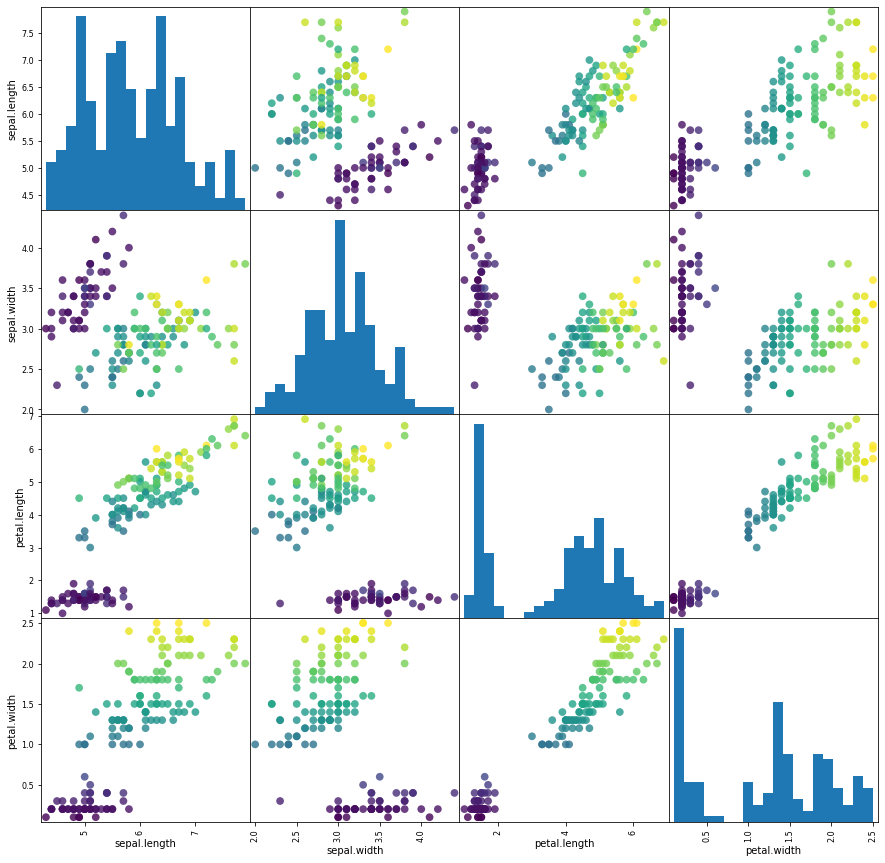

In [6]:
# data is our iris data, c=data[...] tells the function what feature to color
# Pairwise plot plots a feature compared to another. 
# Diagons are histograms of a single feature and off diagnals are cross features

grr = pd.plotting.scatter_matrix(data, c=data["petal.width"], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

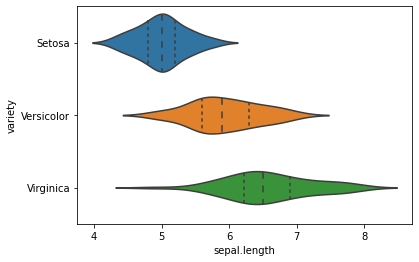

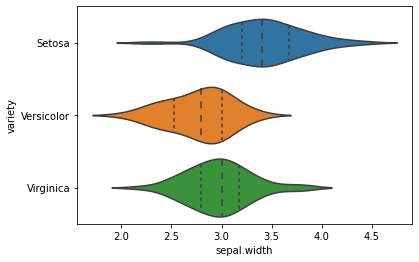

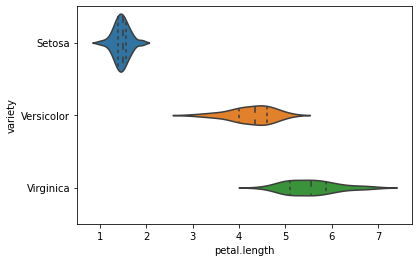

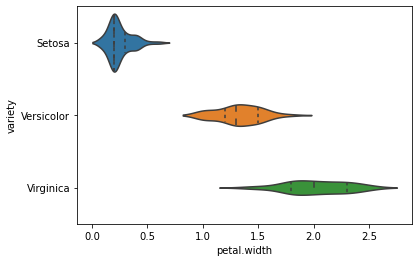

In [7]:
# The violin plot will compare histograms of two features
# Useful to find means, medians, modes, and unexpected data

g = sns.violinplot(y='variety', x='sepal.length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='sepal.width', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal.length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal.width', data=data, inner='quartile')
plt.show()

OK, we've looked through a lot of data so far. The data we've looked at provides statistical information and compares two or more distributions.

What we want to do know is isolate one feature, and use it to train a machine learning model to predict species of an Iris

In [8]:
# X contains all features treated as through they describe the dropped feature
# Y is the feature we are training for

X = data.drop(["variety"],axis=1)
y = data["variety"]

# consider what the shapes are
# are X and y a matrix or a vector?
print(X.shape)
print(y.shape)

(150, 4)
(150,)


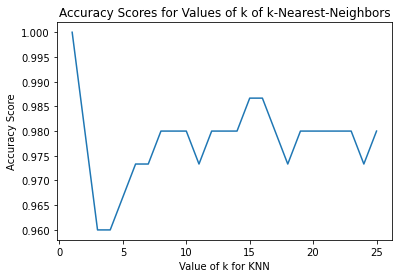

In [9]:
# experimenting with different k values
# k is a hyperparameter, tuning for a specific k is important

k_range = list(range(1,26))
scores = []
for k in k_range:
    # model we are using is Kneighbors - used for classificaiton
    # n_neighbors -> setting the number of neighbors to compare
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit evaluates our model and is our first line of validation 
    knn.fit(X, y)
    # check how well your model predicts your data
    y_pred = knn.predict(X)
    # quantify your results, determines the number of accuratly predicted values
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
# How does your accuracy varry with number of neighbors? What are the best values of k?

In [10]:
# The previous data trainied the model with ALL the data
# That's not a great idea

# Using train_test_split will randomly split up your data into
# training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


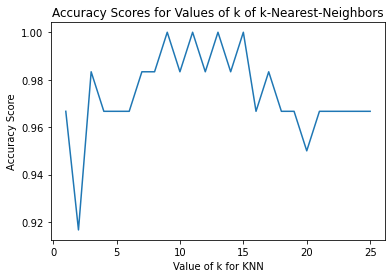

In [11]:
# This block of code is almost the same as above
# The difference is we don't use the FULL data set
# only the training subset

# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# Is the data better or worse? What is the "best" values of k?

In [12]:
# The logreg is in itself a model. We are using it
# to evaluate our testing data compared to your ground truth

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# metrics.accuracy_score(y_test, y_pred) / 1? closer to 1 the better it is

0.9833333333333333


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Look at that! You've worked to optimize a model to predict 
# iris species!

# Run the prediction block (this) and see how well it guesses your iris species

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Versicolor'], dtype=object)

For the very last test, take a look at the data, choose a species (not the one above), and fill in the knn.predict([v1,v2,v3,v4]) with numbers representing a difference species.

If our model is ''ok'', it should accuratly guess it